In [8]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

import severability
from severability.plotting import plot_pie_graph, plot_scan

# Multiscale severability applied to SBM

Graph named 'stochastic_block_model' with 100 nodes and 737 edges


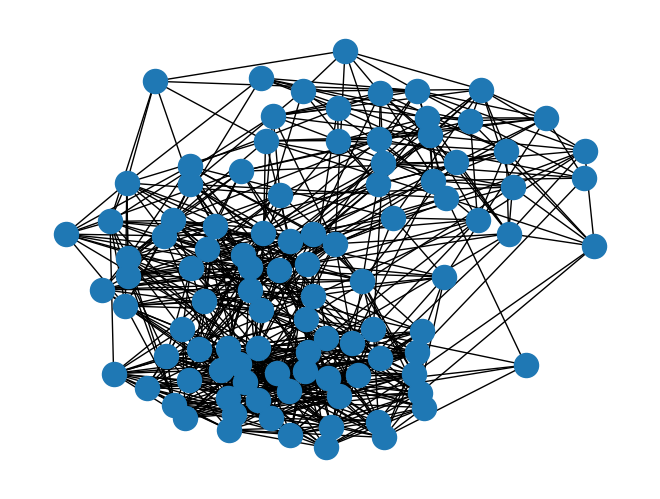

In [2]:
# get SBM graph
sizes = [30, 30, 40]
probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix and convert to np.matrix
A = nx.to_numpy_array(G)
A = np.matrix(A)

# compute transition matrix
P = severability.transition_matrix(A)

In [4]:
# run multiscale severability
sev_results = severability.multiscale_severability(P, 20, n_tries=30, n_rand=30, n_workers=4)

Optimise severability ...


100%|███████████████████████████████████████████| 20/20 [09:18<00:00, 27.95s/it]


Compute 1-Rand(t) ...


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 43.04it/s]

Compute 1-Rand(t,t') ...



/Users/camerontaylor/opt/anaconda3/envs/gt/lib/python3.12/site-packages/severability/optimal_scales.py:45: RuntimeWarning: Mean of empty slice
  return np.nanmean(A_w, axis=(2, 3))


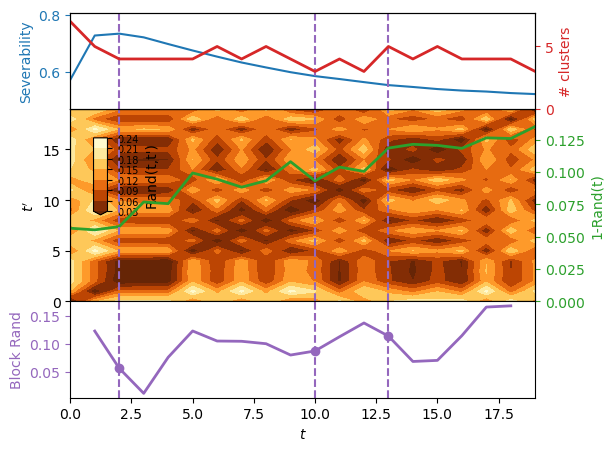

In [12]:
plot_scan(sev_results)

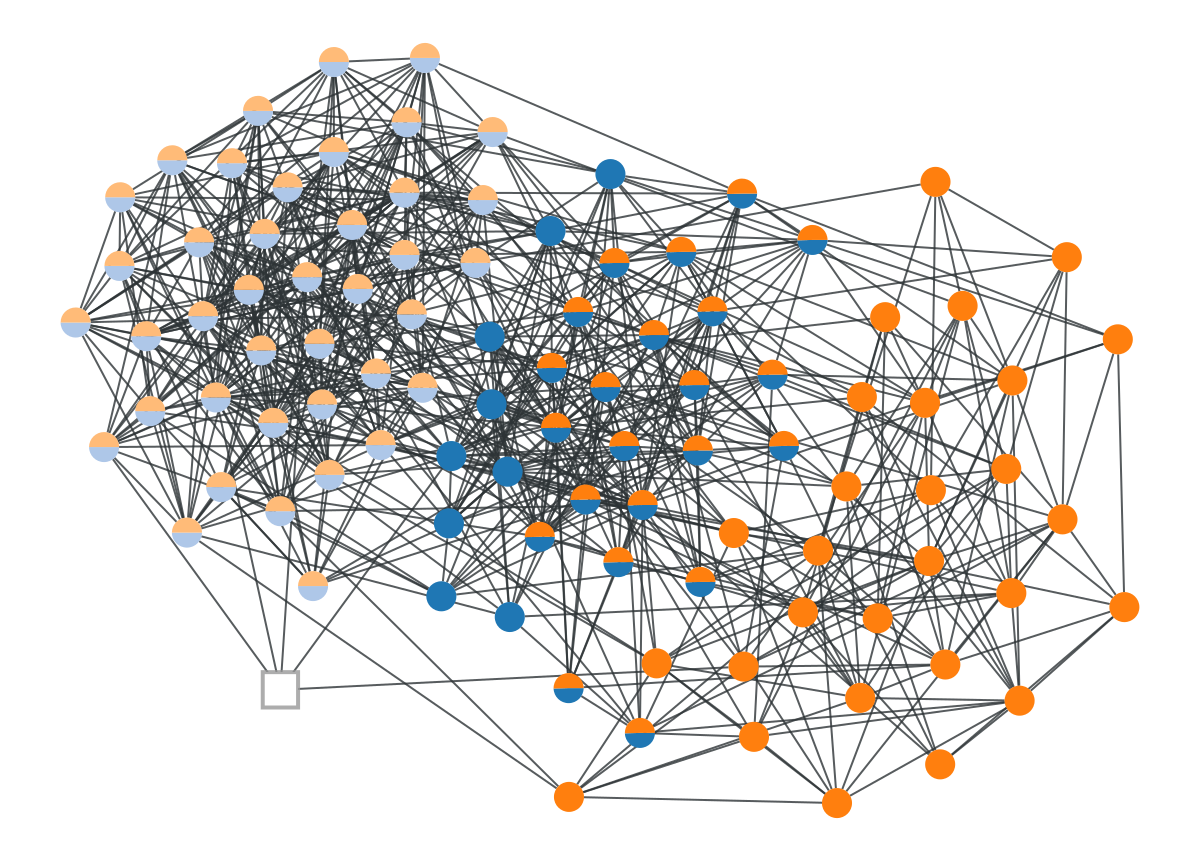

In [13]:
partitions = sev_results['partitions']

partition_to_plot = partitions[1]
n_nodes = len(A)

severability.plotting.plot_pie_graph(partition_to_plot, A, n_nodes)